<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9414%EC%9D%BC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
print("안녕 코랩")

안녕 코랩


In [35]:
print("두번째부터는 빠르다")

두번째부터는 빠르다


In [36]:
import pandas as pd
import numpy as np

# Play Tennis data로 Decision Tree 실습

In [37]:
pd.read_csv('/content/drive/MyDrive/2022새싹/PlayTennis_kaggle.csv')

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [38]:
tennis_data = pd.read_csv('/content/drive/MyDrive/2022새싹/PlayTennis_kaggle.csv')

In [39]:
tennis_data.outlook.replace("sunny",0, inplace=True)
tennis_data

,outlook,temp,humidity,windy,play
0,0,hot,high,False,no
1,0,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,0,mild,high,False,no
8,0,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [40]:
tennis_data.outlook = tennis_data.outlook.replace("overcast", 1)
tennis_data.outlook = tennis_data.outlook.replace("rainy", 2)

In [41]:
tennis_data

,outlook,temp,humidity,windy,play
0,0,hot,high,False,no
1,0,hot,high,True,no
2,1,hot,high,False,yes
3,2,mild,high,False,yes
4,2,cool,normal,False,yes
5,2,cool,normal,True,no
6,1,cool,normal,True,yes
7,0,mild,high,False,no
8,0,cool,normal,False,yes
9,2,mild,normal,False,yes


In [42]:
tennis_data.temp.replace('hot', 1, inplace=True)
tennis_data.temp.replace('mild', 2, inplace=True)
tennis_data.temp.replace('cool', 3, inplace=True)

In [43]:
tennis_data.humidity.replace('high', 1, inplace=True)
tennis_data.humidity.replace('normal', 2, inplace=True)

In [44]:
tennis_data.windy = tennis_data.windy.replace(True, 1)

In [45]:
tennis_data

,outlook,temp,humidity,windy,play
0,0,1,1,0.0,no
1,0,1,1,1.0,no
2,1,1,1,0.0,yes
3,2,2,1,0.0,yes
4,2,3,2,0.0,yes
5,2,3,2,1.0,no
6,1,3,2,1.0,yes
7,0,2,1,0.0,no
8,0,3,2,0.0,yes
9,2,2,2,0.0,yes


In [46]:
tennis_data.play.replace('no', 1, inplace=True)
tennis_data.play.replace('yes', 2, inplace=True)
tennis_data

,outlook,temp,humidity,windy,play
0,0,1,1,0.0,1
1,0,1,1,1.0,1
2,1,1,1,0.0,2
3,2,2,1,0.0,2
4,2,3,2,0.0,2
5,2,3,2,1.0,1
6,1,3,2,1.0,2
7,0,2,1,0.0,1
8,0,3,2,0.0,2
9,2,2,2,0.0,2


In [47]:
X = tennis_data.loc[:,'outlook':'windy'] # 독립변수만 X에 저장
X

,outlook,temp,humidity,windy
0,0,1,1,0.0
1,0,1,1,1.0
2,1,1,1,0.0
3,2,2,1,0.0
4,2,3,2,0.0
5,2,3,2,1.0
6,1,3,2,1.0
7,0,2,1,0.0
8,0,3,2,0.0
9,2,2,2,0.0


In [48]:
y = tennis_data['play'] # 종속변수만 y에 저장
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: play, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_clf = DecisionTreeClassifier()

In [51]:
dt_clf.fit(X, y)

DecisionTreeClassifier()

In [52]:
future = pd.DataFrame(
    data={'outlook':0, 'temp':1, 'humidity':2, 'windy':1},
    index=[0]
    )
future # sunny, hot, normal, windy

,outlook,temp,humidity,windy
0,0,1,2,1


In [53]:
dt_clf.predict(future) # play = yes

array([2])

In [54]:
X

,outlook,temp,humidity,windy
0,0,1,1,0.0
1,0,1,1,1.0
2,1,1,1,0.0
3,2,2,1,0.0
4,2,3,2,0.0
5,2,3,2,1.0
6,1,3,2,1.0
7,0,2,1,0.0
8,0,3,2,0.0
9,2,2,2,0.0


In [55]:
dt_clf.predict(X)

array([1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1])

In [56]:
y

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: play, dtype: int64

In [57]:
dt_clf.predict(X) == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool

In [58]:
np.sum(dt_clf.predict(X) == y)

14

In [59]:
len(y)

14

In [60]:
from sklearn.metrics import accuracy_score

accuracy_score(y, dt_clf.predict(X)) # DT 정확도는 무조건 100%

1.0

## DT 시각화

In [61]:
from sklearn import tree
from IPython.display import Image
import pydotplus
import os

In [62]:
dt_dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['Play_No','Play_Yes'],
                                  filled=True, rounded=True,
                                  special_characters=True)

In [63]:
dt_dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<humidity &le; 1.5<br/>gini = 0.459<br/>samples = 14<br/>value = [5, 9]<br/>class = Play_Yes>, fillcolor="#a7d3f3"] ;\n1 [label=<outlook &le; 0.5<br/>gini = 0.49<br/>samples = 7<br/>value = [4, 3]<br/>class = Play_No>, fillcolor="#f8e0ce"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<gini = 0.0<br/>samples = 3<br/>value = [3, 0]<br/>class = Play_No>, fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label=<outlook &le; 1.5<br/>gini = 0.375<br/>samples = 4<br/>value = [1, 3]<br/>class = Play_Yes>, fillcolor="#7bbeee"] ;\n1 -> 3 ;\n4 [label=<gini = 0.0<br/>samples = 2<br/>value = [0, 2]<br/>class = Play_Yes>, fillcolor="#399de5"] ;\n3 -> 4 ;\n5 [label=<windy &le; 0.5<br/>gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = Play_No>, fillcolor="#ffffff"] ;\n3 -> 5 ;\n6 [label=<gini = 0.0<br/>samples = 1<br/>value = [0, 1]<br/>cla

In [64]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

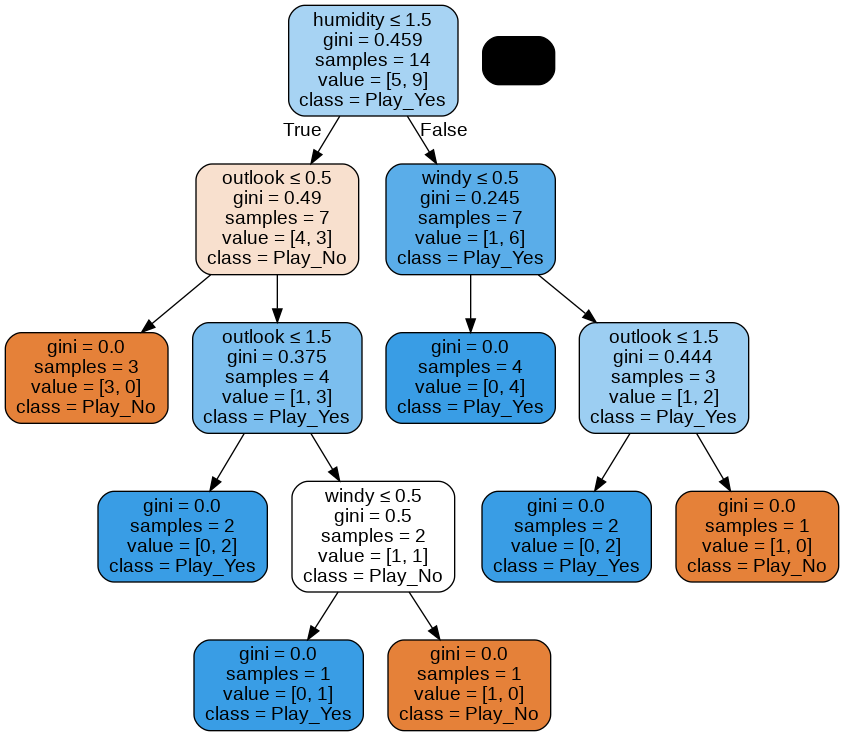

In [65]:
Image(dt_graph.create_png()) # 지니=불순도. 지니지수 낮을수록 잘 분류된 것

In [66]:
# 분류 전 지니 지수
1 - ((5/14)**2 + (9/14)**2) 

0.4591836734693877

In [67]:
# Humidity high 지니
1 - ((4/7)**2 + (3/7)**2)

0.48979591836734704

In [68]:
# Humidity normal 지니
1 - ((1/7)**2 + (6/7)**2)

0.24489795918367352

- Tree 만든 데이터는 정확도 100%. 데이터 보고 Gini 계산해서 Tree 만듬.
- 모든 데이터로 만든 Tree가 정확한 Tree인지 부정확한 Tree인지 알 수 없음.
1. 전체 데이터 중 일부는 Tree 만들고(75%) - Train Set
2. 일부는 Tree 안만들고 보관 - Test Set
- Tree 만들어지고 나서 2에서 보관한 데이터로 Tree가 얼마나 정확한지 측정

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_test_split(X, y)

[    outlook  temp  humidity  windy
 6         1     3         2    1.0
 1         0     1         1    1.0
 4         2     3         2    0.0
 0         0     1         1    0.0
 5         2     3         2    1.0
 13        2     2         1    1.0
 8         0     3         2    0.0
 11        1     2         1    1.0
 9         2     2         2    0.0
 7         0     2         1    0.0,     outlook  temp  humidity  windy
 10        0     2         2    1.0
 12        1     1         2    0.0
 3         2     2         1    0.0
 2         1     1         1    0.0, 6     2
 1     1
 4     2
 0     1
 5     1
 13    1
 8     2
 11    2
 9     2
 7     1
 Name: play, dtype: int64, 10    2
 12    2
 3     2
 2     2
 Name: play, dtype: int64]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [74]:
X_train

,outlook,temp,humidity,windy
7,0,2,1,0.0
9,2,2,2,0.0
8,0,3,2,0.0
3,2,2,1,0.0
5,2,3,2,1.0
12,1,1,2,0.0
6,1,3,2,1.0
11,1,2,1,1.0
1,0,1,1,1.0
0,0,1,1,0.0


In [75]:
dt_clf = DecisionTreeClassifier() # tree 만들 객체

In [76]:
dt_clf.fit(X_train, y_train) # tree를 만들었음

DecisionTreeClassifier()

In [77]:
dt_clf.predict(X_test)

array([1, 1, 2, 2])

In [78]:
y_test

4     2
10    2
2     2
13    1
Name: play, dtype: int64

In [80]:
accuracy_score(y_test, dt_clf.predict(X_test)) # 찐, 예측 순서로 쓴다

0.25

In [84]:
# train:test 비율 바꾸기 8:2
# random_state 정해주기(보통 세자리 씀)
train_test_split(X, y, test_size=0.2, random_state=777)

[    outlook  temp  humidity  windy
 0         0     1         1    0.0
 2         1     1         1    0.0
 9         2     2         2    0.0
 4         2     3         2    0.0
 5         2     3         2    1.0
 10        0     2         2    1.0
 1         0     1         1    1.0
 13        2     2         1    1.0
 6         1     3         2    1.0
 11        1     2         1    1.0
 7         0     2         1    0.0,     outlook  temp  humidity  windy
 3         2     2         1    0.0
 8         0     3         2    0.0
 12        1     1         2    0.0, 0     1
 2     2
 9     2
 4     2
 5     1
 10    2
 1     1
 13    1
 6     2
 11    2
 7     1
 Name: play, dtype: int64, 3     2
 8     2
 12    2
 Name: play, dtype: int64]